# Lab 7- Data Analysis

Exercises 1-4 are to be completed by October 25th. The remaider of the lab is due November 1st. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [2]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  8092k      0 --:--:--  0:01:51 --:--:-- 6796k 0:00:10 --:--:-- 10.2M


In [3]:
!rm SUSY.csv

In [4]:
!gunzip SUSY.csv.gz

In [5]:
ls -lh

total 6.9G
drwxr-xr-x 3 smithb23 smithb23 4.0K Nov 18 12:05 Kaggle.Challange.Student/
-rw-r--r-- 1 smithb23 smithb23 117K Nov 19 18:36 Kaggle1.ipynb
-rw-r--r-- 1 smithb23 smithb23  25K Sep  9 21:17 Lab.2.ipynb
-rw-r--r-- 1 smithb23 smithb23  34K Sep 20 23:38 Lab.3.solution.ipynb
-rw-r--r-- 1 smithb23 smithb23  46K Sep 27 22:27 Lab.4.ipynb
-rw-r--r-- 1 smithb23 smithb23  46K Sep 27 22:28 Lab.4.solutions.ipynb
-rw-r--r-- 1 smithb23 smithb23  11K Oct 15 19:42 Lab.5.solutions.ipynb
-rw-r--r-- 1 smithb23 smithb23 293K Nov 11 22:58 Lab.6.ipynb
-rw-r--r-- 1 smithb23 smithb23 291K Nov 11 23:02 Lab.6.solutions.ipynb
-rw-r--r-- 1 smithb23 smithb23  58K Nov 29 13:27 Lab.7.ipynb
-rw-r--r-- 1 smithb23 smithb23  34K Nov 11 13:24 Lab.8.ipynb
-rw-r--r-- 1 smithb23 smithb23 228M Nov 27 20:10 SUSY-small.csv
-rw-r--r-- 1 smithb23 smithb23 2.3G Nov 29 13:28 SUSY.csv
-rw-r--r-- 1 smithb23 smithb23   14 Sep 27 20:29 Test.foo
-rw-r--r-- 1 smithb23 smithb23    0 Sep 27 20:43 my_drawing.txt
-rw-r--r-- 1 smithb

The data is provided as a comma separated file.

In [6]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [7]:
!ls -lh

total 6.9G
drwxr-xr-x 3 smithb23 smithb23 4.0K Nov 18 12:05 Kaggle.Challange.Student
-rw-r--r-- 1 smithb23 smithb23 117K Nov 19 18:36 Kaggle1.ipynb
-rw-r--r-- 1 smithb23 smithb23  25K Sep  9 21:17 Lab.2.ipynb
-rw-r--r-- 1 smithb23 smithb23  34K Sep 20 23:38 Lab.3.solution.ipynb
-rw-r--r-- 1 smithb23 smithb23  46K Sep 27 22:27 Lab.4.ipynb
-rw-r--r-- 1 smithb23 smithb23  46K Sep 27 22:28 Lab.4.solutions.ipynb
-rw-r--r-- 1 smithb23 smithb23  11K Oct 15 19:42 Lab.5.solutions.ipynb
-rw-r--r-- 1 smithb23 smithb23 293K Nov 11 22:58 Lab.6.ipynb
-rw-r--r-- 1 smithb23 smithb23 291K Nov 11 23:02 Lab.6.solutions.ipynb
-rw-r--r-- 1 smithb23 smithb23  58K Nov 29 13:27 Lab.7.ipynb
-rw-r--r-- 1 smithb23 smithb23  34K Nov 11 13:24 Lab.8.ipynb
-rw-r--r-- 1 smithb23 smithb23 228M Nov 27 20:10 SUSY-small.csv
-rw-r--r-- 1 smithb23 smithb23 2.3G Nov 29 13:28 SUSY.csv
-rw-r--r-- 1 smithb23 smithb23   14 Sep 27 20:29 Test.foo
-rw-r--r-- 1 smithb23 smithb23    0 Sep 27 20:43 my_drawing.txt
-rw-r--r-- 1 smithb2

We see that we have 5 million datapoints.

In [8]:
!wc -l SUSY.csv

5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [9]:
!head -500000 SUSY.csv > SUSY-small.csv

In [10]:
ls -lh

total 6.9G
drwxr-xr-x 3 smithb23 smithb23 4.0K Nov 18 12:05 Kaggle.Challange.Student/
-rw-r--r-- 1 smithb23 smithb23 117K Nov 19 18:36 Kaggle1.ipynb
-rw-r--r-- 1 smithb23 smithb23  25K Sep  9 21:17 Lab.2.ipynb
-rw-r--r-- 1 smithb23 smithb23  34K Sep 20 23:38 Lab.3.solution.ipynb
-rw-r--r-- 1 smithb23 smithb23  46K Sep 27 22:27 Lab.4.ipynb
-rw-r--r-- 1 smithb23 smithb23  46K Sep 27 22:28 Lab.4.solutions.ipynb
-rw-r--r-- 1 smithb23 smithb23  11K Oct 15 19:42 Lab.5.solutions.ipynb
-rw-r--r-- 1 smithb23 smithb23 293K Nov 11 22:58 Lab.6.ipynb
-rw-r--r-- 1 smithb23 smithb23 291K Nov 11 23:02 Lab.6.solutions.ipynb
-rw-r--r-- 1 smithb23 smithb23  58K Nov 29 13:27 Lab.7.ipynb
-rw-r--r-- 1 smithb23 smithb23  34K Nov 11 13:24 Lab.8.ipynb
-rw-r--r-- 1 smithb23 smithb23 228M Nov 29 13:28 SUSY-small.csv
-rw-r--r-- 1 smithb23 smithb23 2.3G Nov 29 13:28 SUSY.csv
-rw-r--r-- 1 smithb23 smithb23   14 Sep 27 20:29 Test.foo
-rw-r--r-- 1 smithb23 smithb23    0 Sep 27 20:43 my_drawing.txt
-rw-r--r-- 1 smithb

In [11]:
! wc -l SUSY-small.csv

500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [2]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [13]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [14]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [15]:
FeatureNames

['R',
 'dPhi_r_b',
 'axial_MET',
 'M_TR_2',
 'MT2',
 'cos_theta_r1',
 'S_R',
 'M_R',
 'MET_rel',
 'M_Delta_R']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [4]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [18]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [19]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


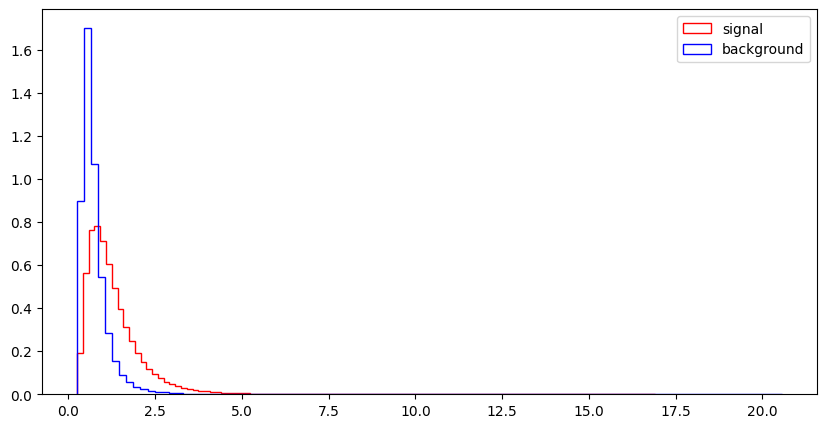

l_1_eta


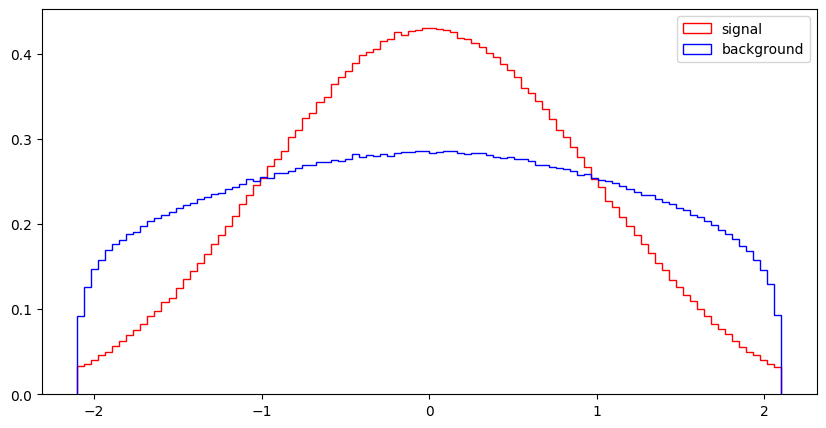

l_1_phi


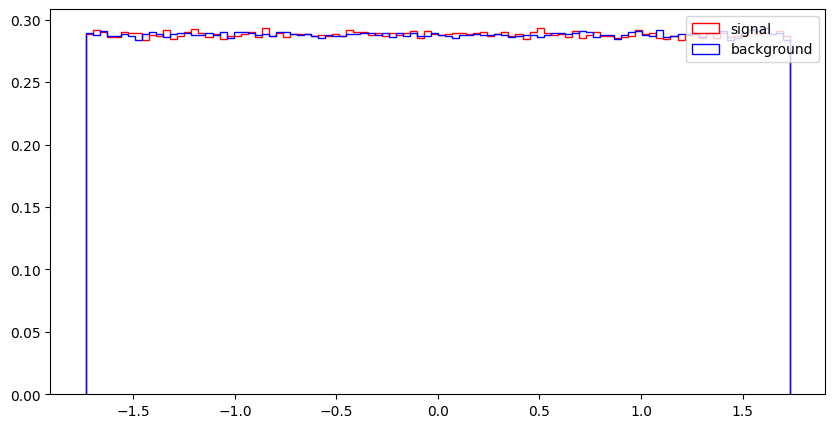

l_2_pT


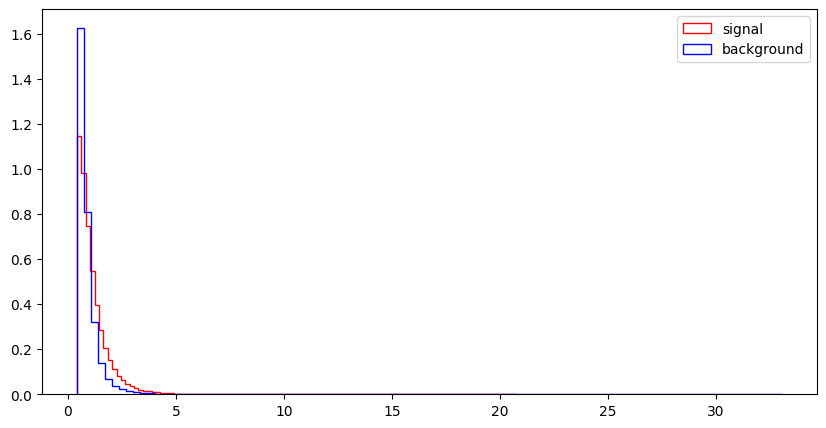

l_2_eta


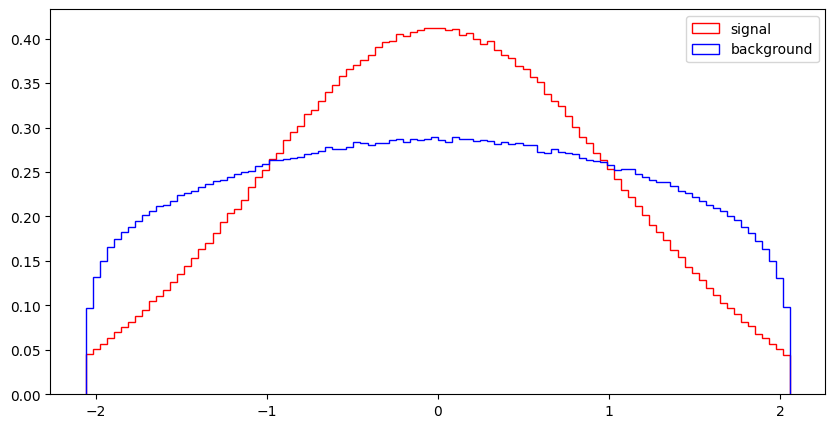

l_2_phi


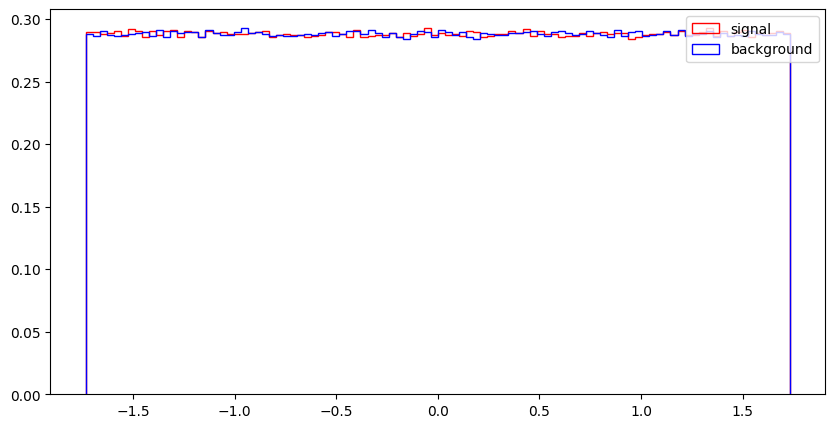

MET


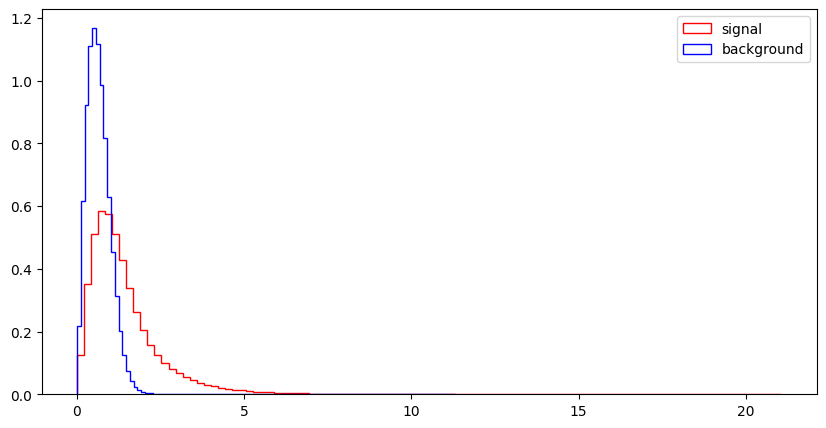

MET_phi


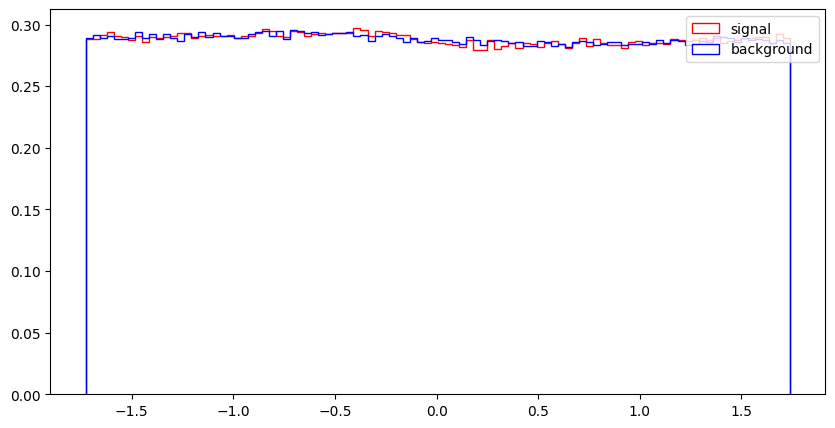

MET_rel


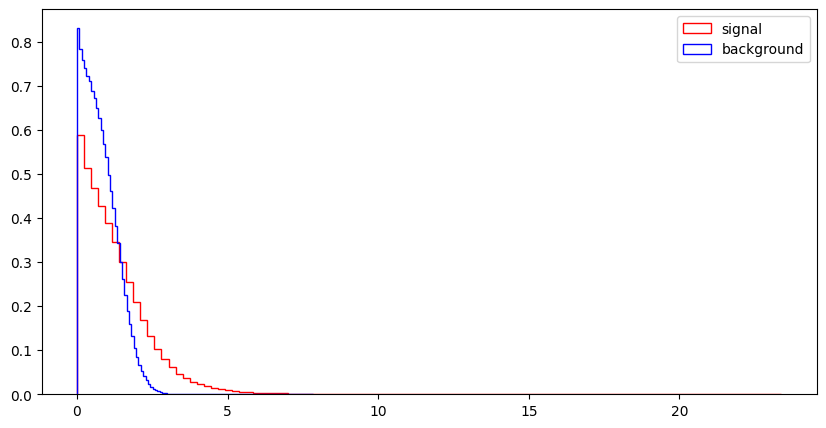

axial_MET


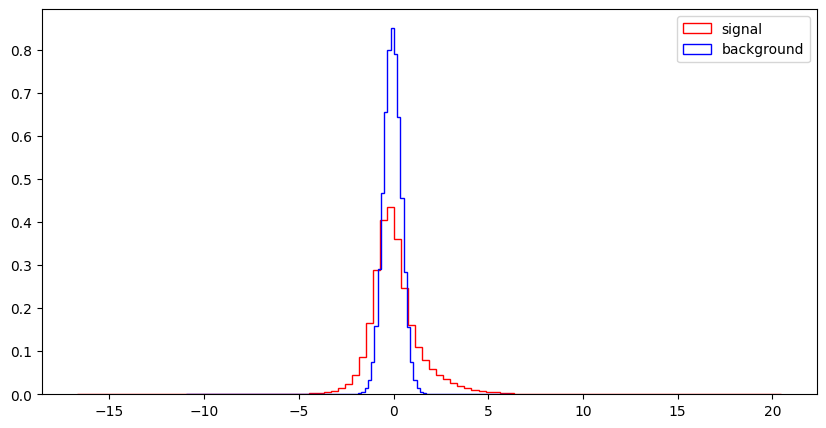

M_R


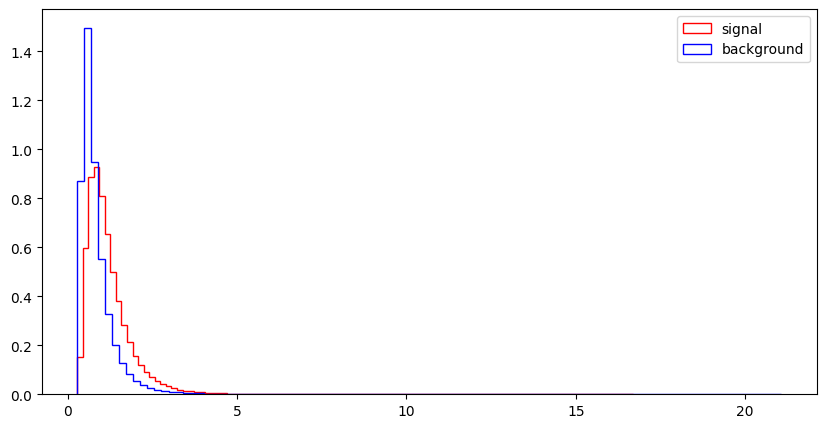

M_TR_2


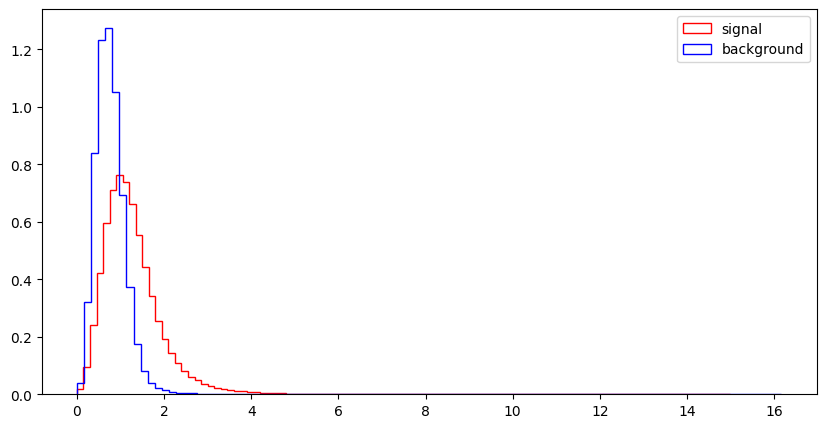

R


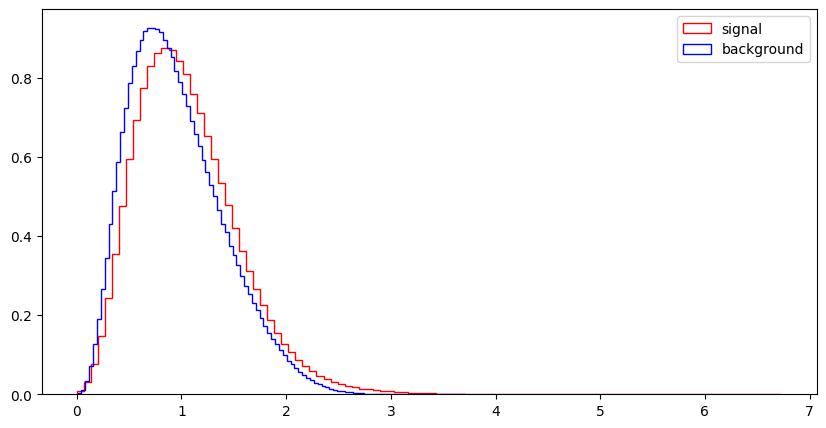

MT2


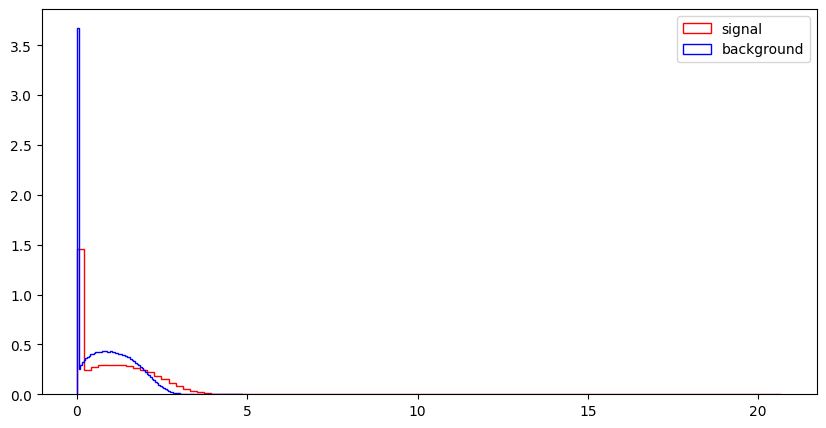

S_R


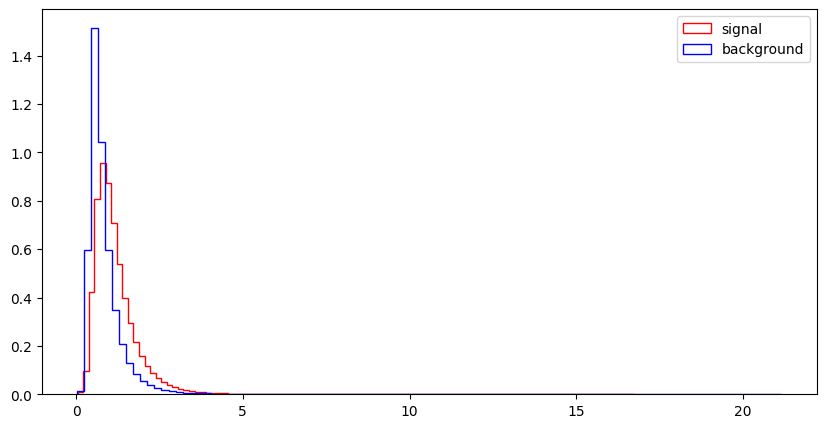

M_Delta_R


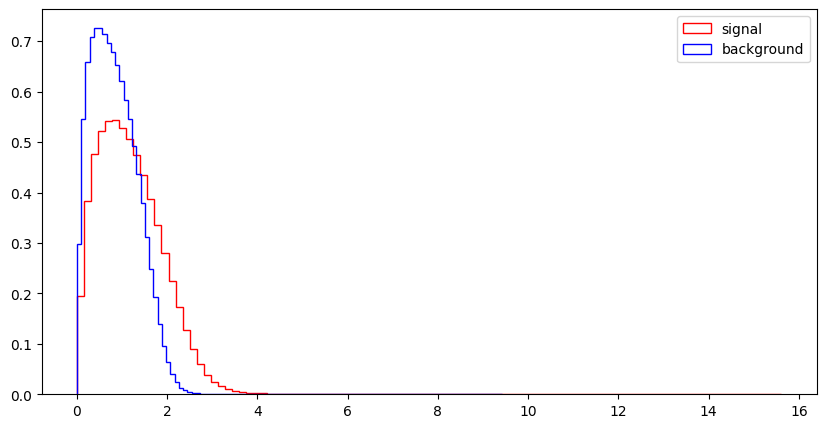

dPhi_r_b


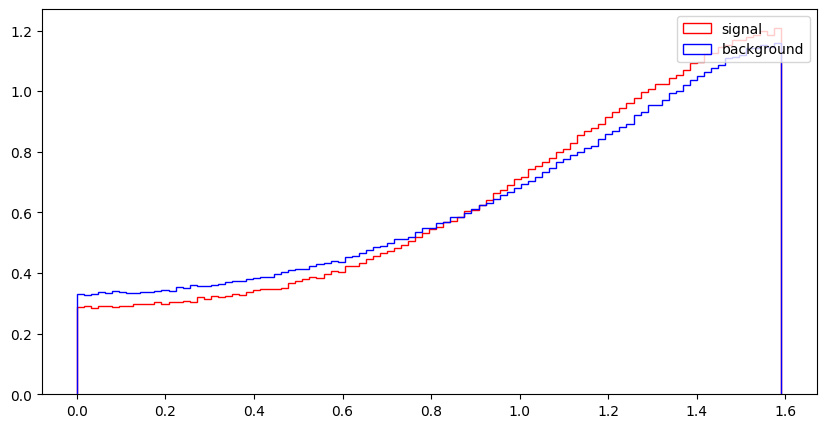

cos_theta_r1


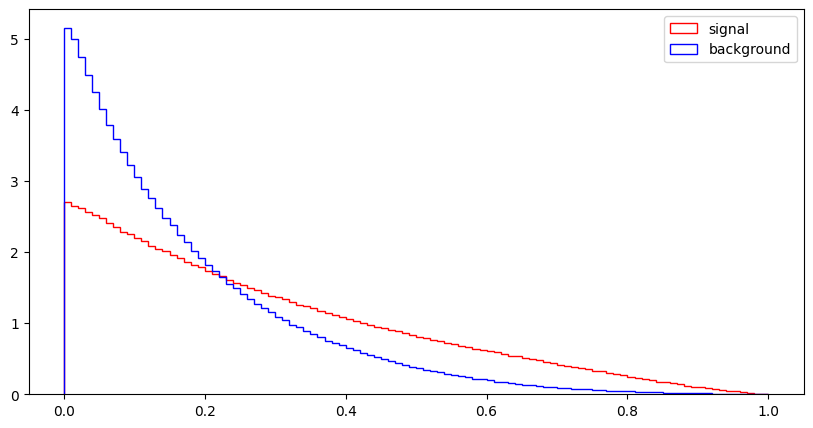

In [20]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

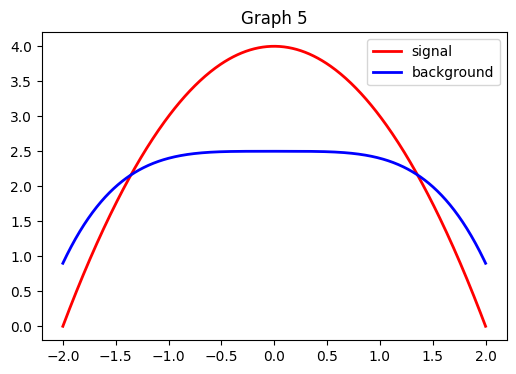

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x
# Linspace creates points with equal space between the points
x = np.linspace(-2, 2, 500)

# Define the two mathmatical functions
a = -1  
b = 0
c = 4

y = a * x**2 + b * x + c

d = -0.1  
e = 0
f = 2.5

y2 = d * x**4 + e * x**2 +f

# Create a figure and axis
plt.figure(figsize=(6, 4))

# Plot the first function
plt.plot(x, y, label="signal", color="red", linewidth=2)

# Plot the second function
plt.plot(x, y2, label="background", color="blue", linewidth=2)

plt.title("Graph 5")
plt.legend()  

# Show the plot
plt.show()

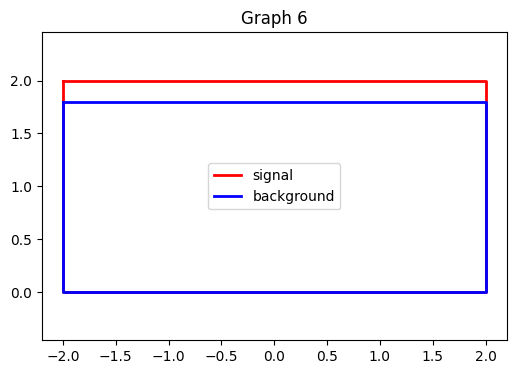

In [22]:
# Define the rectangle
x = [-2, 2, 2, -2, -2]  
y = [2, 2, 0, 0, 2] 
y2 = [ 1.8, 1.8, 0, 0, 1.8]

# Create a figure and axis
plt.figure(figsize=(6, 4))

# Plot the first function
plt.plot(x, y, label="signal", color="red", linewidth=2)

# Plot the second function
plt.plot(x, y2, label="background", color="blue", linewidth=2)

plt.ylim(0, None) 


plt.title("Graph 6")
plt.legend()  

# Set aspect ratio to equal to make it look correct
plt.axis("equal")

# Show the plot
plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

In [5]:
#part a
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

filename_2 = "SUSY-small.csv"
susy_df = pd.read_csv(filename, dtype='float64', names=VarNames)

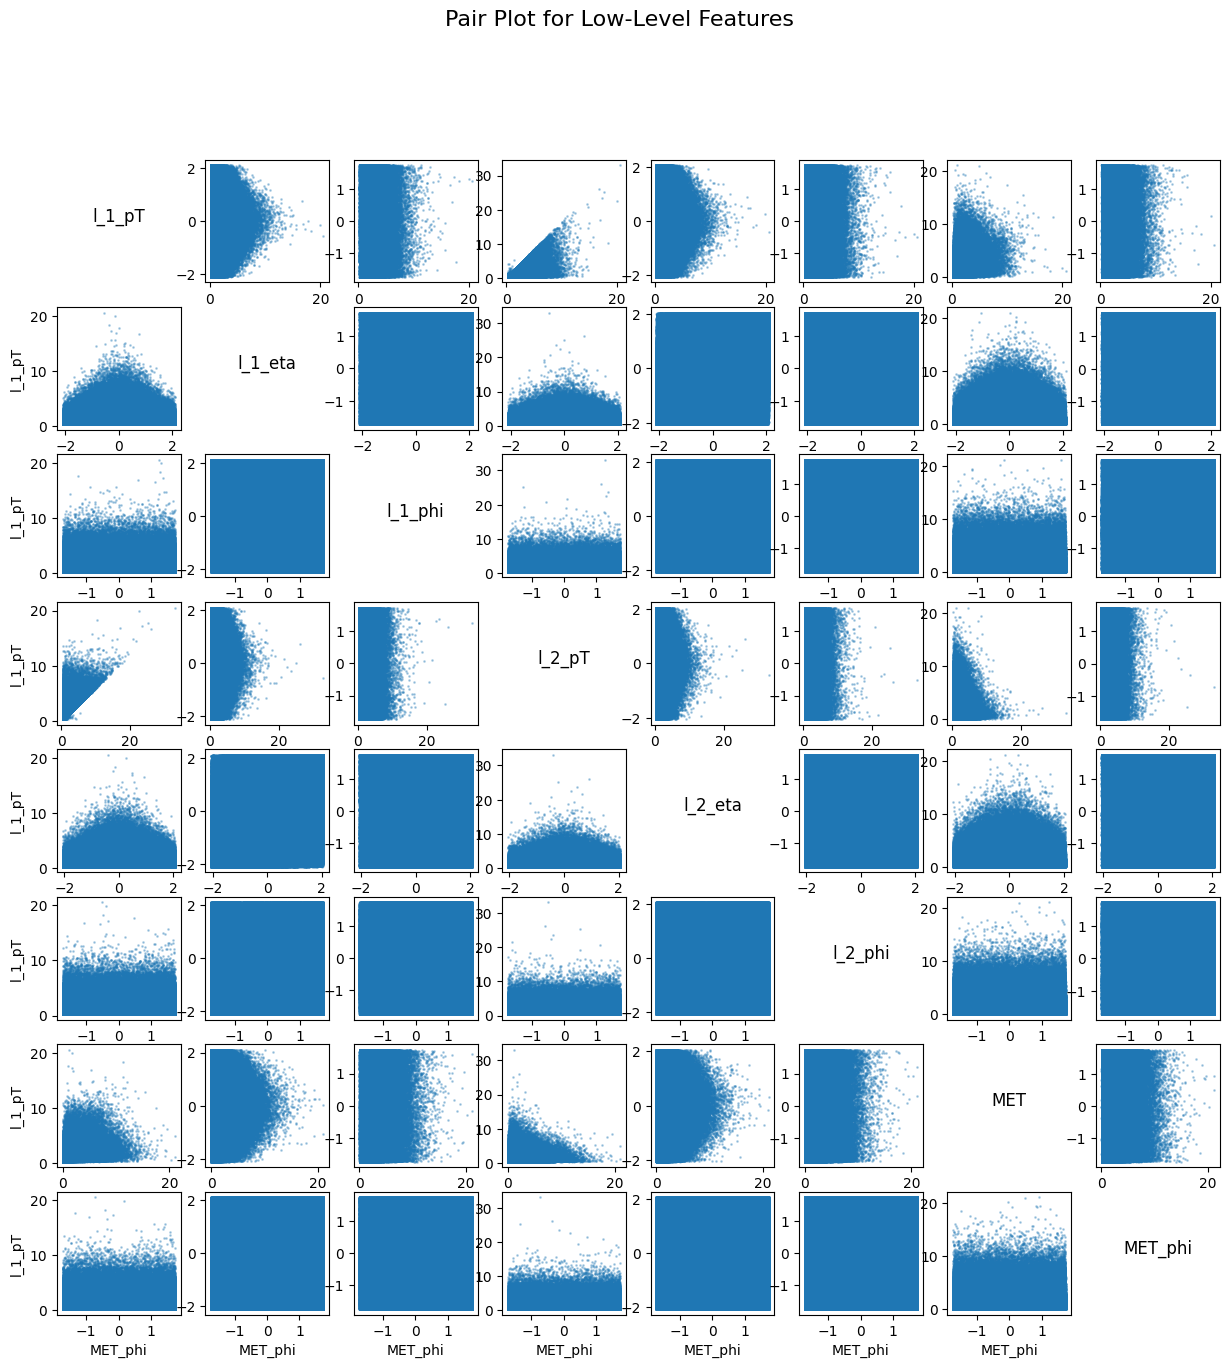

In [ ]:
def pair_plot(data: pd.DataFrame, feature_names: list, title: str = "Pair Plot"):
    num_features = len(feature_names)
    fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))
    fig.suptitle(title, fontsize=16)
    
    for i, feature_x in enumerate(feature_names):
        for j, feature_y in enumerate(feature_names):
            ax = axes[i, j]

            # No point in plotting a graph against itself
            if i == j:
                ax.text(0.5, 0.5, feature_x, fontsize=12, ha='center')
                ax.axis('off')
            else:
                ax.scatter(data[feature_x], data[feature_y], alpha=0.3, s=1)
            
            if j == 0:
                ax.set_ylabel(feature_y)
            if i == num_features - 1:
                ax.set_xlabel(feature_x)
                
    
    plt.show()

low_level_features = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi']
high_level_features = ['MET_rel', 'dPhi_r_b', 'cos_theta_r1', 'R', 'M_TR_2', 'MT2', 'M_R', 'M_Delta_R', 'S_R', 'axial_MET']

pair_plot(susy_df, low_level_features, title="Pair Plot for Low-Level Features")
pair_plot(susy_df, high_level_features, title="Pair Plot for High-Level Features")

In [ ]:
#part b
def pair_plot_with_hexbin(data: pd.DataFrame, feature_names: list, title: str = "Pair Plot", sample_size: int = 5000):
    num_features = len(feature_names)
    fig, axes = plt.subplots(num_features, num_features, figsize=(14, 14))
    fig.suptitle(title, fontsize=14)
    
    if len(data) > sample_size:
        sampled_data = data.sample(sample_size, random_state=42)
    else:
        sampled_data = data
    
    for i, feature_x in enumerate(feature_names):
        for j, feature_y in enumerate(feature_names):
            ax = axes[i, j]

            # No point in plotting a graph against itself
            if i == j:
                ax.text(0.5, 0.5, feature_x, fontsize=12, ha='center')
                ax.axis('off')
            else:
                # Create a hexbin plot instead of scatter
                hb = ax.hexbin(sampled_data[feature_x], sampled_data[feature_y], gridsize=30, cmap='Blues')
                fig.colorbar(hb, ax=ax)  # Add a color bar to indicate density
                
            if j == 0:
                ax.set_ylabel(feature_y)
            if i == num_features - 1:
                ax.set_xlabel(feature_x)
                
    
    plt.show()

pair_plot_with_hexbin(susy_df, low_level_features, title="Hexbin Plot for Low-Level Features", sample_size=5000)
pair_plot_with_hexbin(susy_df, high_level_features, title="Hexbin Plot for High-Level Features", sample_size=5000)

In [ ]:
#part c
 MET, l_1_pT, MT2, MET_rel, and dPhi_r_b are all likely the most helpful features for separating signal from background

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [ ]:
!pip install tabulate

Hint: Example code for embedding a `tabulate` table into a notebook:

In [ ]:
#part b
import numpy as np
import pandas as pd

low_level_features = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi']
high_level_features = ['MET_rel', 'dPhi_r_b', 'cos_theta_r1', 'R', 'M_TR_2', 'MT2', 'M_R', 'M_Delta_R', 'S_R', 'axial_MET']

# Combine both sets of features for all features
all_features = low_level_features + high_level_features

# covariance matrix for all features
cov_all = np.cov(susy_df[all_features], rowvar=False)

# correlation matrix for all features
corr_all = np.corrcoef(susy_df[all_features], rowvar=False)

# covariance matrix for low-level features
cov_low = np.cov(susy_df[low_level_features], rowvar=False)

# correlation matrix for low-level features
corr_low = np.corrcoef(susy_df[low_level_features], rowvar=False)

# covariance matrix for high-level features
cov_high = np.cov(susy_df[high_level_features], rowvar=False)

# correlation matrix for high-level features
corr_high = np.corrcoef(susy_df[high_level_features], rowvar=False)

# Print the results
from tabulate import tabulate

print("Covariance Matrix for All Features:")
print(tabulate(cov_all, headers=all_features, tablefmt="grid"))

print("\nCorrelation Matrix for All Features:")
print(tabulate(corr_all, headers=all_features, tablefmt="grid"))

print("\nCovariance Matrix for Low-Level Features:")
print(tabulate(cov_low, headers=low_level_features, tablefmt="grid"))

print("\nCorrelation Matrix for Low-Level Features:")
print(tabulate(corr_low, headers=low_level_features, tablefmt="grid"))

print("\nCovariance Matrix for High-Level Features:")
print(tabulate(cov_high, headers=high_level_features, tablefmt="grid"))

print("\nCorrelation Matrix for High-Level Features:")
print(tabulate(corr_high, headers=high_level_features, tablefmt="grid"))

In [ ]:
#part c/d
from IPython.display import HTML, display

def compute_and_display_matrices(data, feature_set, table_title, cov_decimals=2, corr_decimals=3):
    
    # covariance and correlation matrices
    cov_matrix = np.cov(data[feature_set], rowvar=False)
    corr_matrix = np.corrcoef(data[feature_set], rowvar=False)
    
    # Round matrices to specific decimal places
    cov_matrix_formatted = np.round(cov_matrix, cov_decimals)
    corr_matrix_formatted = np.round(corr_matrix, corr_decimals)
    
    # Makes tables
    cov_html = tabulate(cov_matrix_formatted, headers=feature_set, tablefmt="html", floatfmt=f".{cov_decimals}f")
    corr_html = tabulate(corr_matrix_formatted, headers=feature_set, tablefmt="html", floatfmt=f".{corr_decimals}f")
    
    # Display tables
    display(HTML(f"Covariance Matrix for Features: {(table_title)}"))
    display(HTML(cov_html))
    
    display(HTML(f"Correlation Matrix for Features: {(table_title)}"))
    display(HTML(corr_html))

compute_and_display_matrices(susy_df, all_features, "All features")
compute_and_display_matrices(susy_df, low_level_features, "Low level features")
compute_and_display_matrices(susy_df, high_level_features, "High level features")

In [ ]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

In [ ]:
#5.1
import matplotlib.pyplot as plt

def plot_signal_background_distribution(data, observable, signal_mask, background_mask):

    plt.hist(data[observable][signal_mask], bins=50, alpha=0.5, label='Signal', density=True)
    plt.hist(data[observable][background_mask], bins=50, alpha=0.5, label='Background', density=True)
    plt.xlabel(observable)
    plt.ylabel("Density")
    plt.legend()
    plt.title(f"Signal and Background Distribution for {observable}")
    plt.show()

def find_optimal_threshold(data, observable, signal_mask, background_mask):

    mu = data[observable][background_mask].mean()  # Mean of background for centered criteria
    total_signal = signal_mask.sum()
    total_background = background_mask.sum()
    
    # Range of x_c values to test
    x_values = np.linspace(data[observable].min(), data[observable].max(), 100)
    
    # Store best x_c values for each criterion
    results = {'x > x_c': (0, 0), 'x < x_c': (0, 0), '|x - mu| > x_c': (0, 0), '|x - mu| < x_c': (0, 0)}
    
    for x_c in x_values:
        # Criterion 1: x > x_c
        signal_pass = np.sum(signal_mask & (data[observable] > x_c))
        background_pass = np.sum(background_mask & (data[observable] > x_c))
        
        # Calculate metrics
        signal_efficiency = signal_pass / total_signal if total_signal > 0 else 0
        background_rejection = 1 - (background_pass / total_background) if total_background > 0 else 1
        signal_purity = signal_pass / (signal_pass + background_pass) if (signal_pass + background_pass) > 0 else 0
        
        # Update results if this threshold improves separation (e.g., maximize purity)
        if signal_purity > results['x > x_c'][1]:
            results['x > x_c'] = (x_c, signal_purity)
        
        # Repeat for other criteria
        signal_pass = np.sum(signal_mask & (data[observable] < x_c))
        background_pass = np.sum(background_mask & (data[observable] < x_c))
        signal_purity = signal_pass / (signal_pass + background_pass) if (signal_pass + background_pass) > 0 else 0
        if signal_purity > results['x < x_c'][1]:
            results['x < x_c'] = (x_c, signal_purity)
        
        signal_pass = np.sum(signal_mask & (np.abs(data[observable] - mu) > x_c))
        background_pass = np.sum(background_mask & (np.abs(data[observable] - mu) > x_c))
        signal_purity = signal_pass / (signal_pass + background_pass) if (signal_pass + background_pass) > 0 else 0
        if signal_purity > results['|x - mu| > x_c'][1]:
            results['|x - mu| > x_c'] = (x_c, signal_purity)
        
        signal_pass = np.sum(signal_mask & (np.abs(data[observable] - mu) < x_c))
        background_pass = np.sum(background_mask & (np.abs(data[observable] - mu) < x_c))
        signal_purity = signal_pass / (signal_pass + background_pass) if (signal_pass + background_pass) > 0 else 0
        if signal_purity > results['|x - mu| < x_c'][1]:
            results['|x - mu| < x_c'] = (x_c, signal_purity)
    
    return results
    
def format_results(results, decimals=3):
    formatted_results = {}
    for criterion, (threshold, metric) in results.items():
        formatted_results[criterion] = (round(float(threshold), decimals), round(float(metric), decimals))
    return formatted_results  


def automate_analysis(data, observables, label_column='signal'):
    signal_mask = data[label_column] == 1
    background_mask = data[label_column] == 0
    
    optimal_thresholds_all = {}
    
    for observable in observables:
        print(f"Analyzing {observable}")
        
        # Find optimal thresholds
        thresholds = find_optimal_threshold(data, observable, signal_mask, background_mask)
        
        # Format results
        formatted_thresholds = format_results(thresholds)
        
        # Store formatted results
        optimal_thresholds_all[observable] = formatted_thresholds
    
    return optimal_thresholds_all

# Define the list of observables
observables = [
    'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 
    'MET', 'MET_phi', 'MET_rel', 'dPhi_r_b', 'cos_theta_r1', 
    'R', 'M_TR_2', 'MT2', 'M_R', 'M_Delta_R', 'S_R', 'axial_MET'
]

# Perform the analysis
optimal_thresholds = automate_analysis(susy_df, observables, label_column='signal')

# Print the results
from pprint import pprint
pprint(optimal_thresholds)

In [ ]:
#5.2

def plot_tpr_fpr(data, observable, signal_mask, background_mask):
    
    # Total number of signal and background events
    total_signal = signal_mask.sum()
    total_background = background_mask.sum()
    
    # Range of x_c to evaluate
    x_values = np.linspace(data[observable].min(), data[observable].max(), 100)
    tpr_values = []
    fpr_values = []

    # Calculate TPR and FPR for each x_c
    for x_c in x_values:
        # Signal passing criterion
        signal_pass = np.sum(signal_mask & (data[observable] > x_c))
        # Background passing criterion
        background_pass = np.sum(background_mask & (data[observable] > x_c))
        
        # Compute TPR and FPR
        tpr = signal_pass / total_signal if total_signal > 0 else 0
        fpr = background_pass / total_background if total_background > 0 else 0
        
        tpr_values.append(tpr)
        fpr_values.append(fpr)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, tpr_values, label="TPR (Signal Efficiency)", color="red")
    plt.plot(x_values, fpr_values, label="FPR (Background Efficiency)", color="blue")
    plt.axvline(x=x_values[np.argmax(np.array(tpr_values) - np.array(fpr_values))], color="green", linestyle="--", label="Optimal x_c")
    plt.title(f"TPR and FPR as a function of $x_c$ for {observable}")
    plt.xlabel("$x_c$")
    plt.ylabel("Efficiency")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

def automate_tpr_fpr(data, observables, label_column='signal'):

    signal_mask = data[label_column] == 1
    background_mask = data[label_column] == 0
    
    for observable in observables:
        print(f"\TPR and FPR plots for {observable}...")
        plot_tpr_fpr(data, observable, signal_mask, background_mask)

observables = [
    'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 
    'MET', 'MET_phi', 'MET_rel', 'dPhi_r_b', 'cos_theta_r1', 
    'R', 'M_TR_2', 'MT2', 'M_R', 'M_Delta_R', 'S_R', 'axial_MET'
]

automate_tpr_fpr(susy_df, observables, label_column='signal')

In [ ]:
#5.3

def calculate_significance(data, observable, signal_mask, background_mask, N_S, N_B):

    total_signal = signal_mask.sum()
    total_background = background_mask.sum()
    
    # Generate thresholds for analysis
    x_values = np.linspace(data[observable].min(), data[observable].max(), 100)
    significance_values = []
    
    for x_c in x_values:
        # Calculate signal and background efficiencies
        epsilon_S = np.sum(signal_mask & (data[observable] > x_c)) / total_signal if total_signal > 0 else 0
        epsilon_B = np.sum(background_mask & (data[observable] > x_c)) / total_background if total_background > 0 else 0
        
        # Calculate N'_S and N'_B
        N_prime_S = epsilon_S * N_S
        N_prime_B = epsilon_B * N_B
        
        # Calculate significance (sigma_S')
        if (N_prime_S + N_prime_B) > 0:
            sigma_S_prime = N_prime_S / np.sqrt(N_prime_S + N_prime_B)
        else:
            sigma_S_prime = 0
        
        significance_values.append(sigma_S_prime)
    
    return x_values, significance_values

def plot_significance(data, observables, signal_mask, background_mask, scenarios):

    for observable in observables:
        plt.figure(figsize=(10, 6))
        plt.title(f"Significance vs Threshold for {observable}")
        plt.xlabel(f"Threshold (x_c) for {observable}")
        plt.ylabel(r"$\sigma_{S'}$ (Significance)")
        
        # For each scenario, calculate and plot the significance
        for N_S, N_B in scenarios:
            x_values, significance_values = calculate_significance(data, observable, signal_mask, background_mask, N_S, N_B)
            plt.plot(x_values, significance_values, label=f"N_S={N_S}, N_B={N_B}")
        
        plt.legend()
        plt.grid(True)
        plt.show()

def automate_significance(data, observables, label_column='signal'):

    signal_mask = data[label_column] == 1
    background_mask = data[label_column] == 0
    
    # Define the scenarios for the number of signal and background events
    scenarios = [
        (10, 100),   # N_S=10, N_B=100
        (100, 1000), # N_S=100, N_B=1000
        (1000, 10000), # N_S=1000, N_B=10000
        (10000, 100000) # N_S=10000, N_B=100000
    ]
    
    # Plot significance for all observables and scenarios
    plot_significance(data, observables, signal_mask, background_mask, scenarios)

observables = [
    'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 
    'MET', 'MET_phi', 'MET_rel', 'cos_theta_r1', 
    'R', 'M_TR_2', 'MT2', 'M_R', 'M_Delta_Rhi', 'S_R', 'axial_MET'
]

automate_significance(susy_df, observables, label_column='signal')

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [ ]:
#chose are l_1_pT, MET, M_TR_2

In [ ]:
#6.2
selected_observables = {
    'l_1_pT': 11.492,   
    'MET': 21.069,
    'M_TR_2': 10.854
}

def calculate_cut_flow(data, selected_observables, signal_mask, background_mask, N_S, N_B):
    """
    Calculates the cut-flow table for each scenario.
    """
    # Start by creating an empty list to store the results
    cut_flow_table = []
    
    # Keep track of signal and background passing counts
    total_signal = signal_mask.sum()
    total_background = background_mask.sum()
    
    # Initially, before any cuts, all events pass
    signal_efficiency = 1.0
    background_efficiency = 1.0
    N_prime_S = N_S
    N_prime_B = N_B
    
    # Add the initial row for the table
    cut_flow_table.append([
        "No cuts", signal_efficiency, background_efficiency, N_prime_S, N_prime_B, 
        N_prime_S / np.sqrt(N_prime_S + N_prime_B) if (N_prime_S + N_prime_B) > 0 else 0
    ])
    
    # Apply the cuts sequentially for each observable
    for observable, threshold in selected_observables.items():
        # Apply the cut for the current observable
        signal_pass = np.sum(signal_mask & (data[observable] > threshold))
        background_pass = np.sum(background_mask & (data[observable] > threshold))
        
        # Update efficiencies
        signal_efficiency = signal_pass / total_signal if total_signal > 0 else 0
        background_efficiency = background_pass / total_background if total_background > 0 else 0
        
        # Update effective signal and background events
        N_prime_S = signal_efficiency * N_S
        N_prime_B = background_efficiency * N_B
        
        # Add the row for the current cut
        cut_flow_table.append([
            f"Cut: {observable} > {threshold}", signal_efficiency, background_efficiency, N_prime_S, N_prime_B, 
            N_prime_S / np.sqrt(N_prime_S + N_prime_B) if (N_prime_S + N_prime_B) > 0 else 0
        ])
    
    return cut_flow_table

def display_cut_flow_table(cut_flow_table, scenario):

    headers = ["Selection Step", r"epsilon_S", r"epsilon_B", r"N'_S", r"N'_B", r"sigma_{S'}"]
    print(f"Cut-flow table for scenario (N_S={scenario[0]}, N_B={scenario[1]}):")
    print(tabulate(cut_flow_table, headers=headers, floatfmt=".3f", tablefmt="pretty"))
    
def automate_cut_flow(data, selected_observables, scenarios, label_column='signal'):

    signal_mask = data[label_column] == 1
    background_mask = data[label_column] == 0
    
    # For each scenario, generate and display the cut-flow table
    for scenario in scenarios:
        cut_flow_table = calculate_cut_flow(data, selected_observables, signal_mask, background_mask, scenario[0], scenario[1])
        display_cut_flow_table(cut_flow_table, scenario)

# Example selected observables and their corresponding optimal thresholds
selected_observables = {
    'l_1_pT': 11.492,  
    'MET': 21.069,
    'M_TR_2': 10.854
}

# Scenarios
scenarios = [
    (10, 100),   # N_S=10, N_B=100
    (100, 1000), # N_S=100, N_B=1000
    (1000, 10000), # N_S=1000, N_B=10000
    (10000, 100000) # N_S=10000, N_B=100000
]

automate_cut_flow(susy_df, selected_observables, scenarios, label_column='signal')

In [ ]:
#6.3

def compute_significance(N_S, N_B, epsilon_S, epsilon_B):

    N_prime_S = epsilon_S * N_S
    N_prime_B = epsilon_B * N_B
    return N_prime_S / np.sqrt(N_prime_S + N_prime_B) if (N_prime_S + N_prime_B) > 0 else 0

def optimize_sequential(data, observable_1, observable_2, signal_mask, background_mask, N_S, N_B):
 
    thresholds_1 = find_optimal_threshold(data, observable_1, signal_mask, background_mask)
    threshold_value_1, _ = thresholds_1['x > x_c']  # Example: Use 'x > x_c' for selection

    selected_mask_1 = signal_mask & (data[observable_1] > threshold_value_1)
    selected_mask_bkg_1 = background_mask & (data[observable_1] > threshold_value_1)

    epsilon_S_1_selected = selected_mask_1.sum() / signal_mask.sum()
    epsilon_B_1_selected = selected_mask_bkg_1.sum() / background_mask.sum()
 
    thresholds_2 = find_optimal_threshold(data[selected_mask_1 | selected_mask_bkg_1], observable_2, selected_mask_1, selected_mask_bkg_1)
    threshold_value_2, _ = thresholds_2['x > x_c']  # Example: Use 'x > x_c' for selection

    selected_mask_2 = selected_mask_1 & (data[observable_2] > threshold_value_2)
    selected_mask_bkg_2 = selected_mask_bkg_1 & (data[observable_2] > threshold_value_2)

    epsilon_S_2_selected = selected_mask_2.sum() / signal_mask.sum()
    epsilon_B_2_selected = selected_mask_bkg_2.sum() / background_mask.sum()
    
    significance_1_then_2 = compute_significance(N_S, N_B, epsilon_S_2_selected, epsilon_B_2_selected)

    thresholds_2_rev = find_optimal_threshold(data, observable_2, signal_mask, background_mask)
    threshold_value_2_rev, _ = thresholds_2_rev['x > x_c']  # Example: Use 'x > x_c' for selection

    selected_mask_2_rev = signal_mask & (data[observable_2] > threshold_value_2_rev)
    selected_mask_bkg_2_rev = background_mask & (data[observable_2] > threshold_value_2_rev)
    
    epsilon_S_2_rev_selected = selected_mask_2_rev.sum() / signal_mask.sum()
    epsilon_B_2_rev_selected = selected_mask_bkg_2_rev.sum() / background_mask.sum()
    
    thresholds_1_rev = find_optimal_threshold(data[selected_mask_2_rev | selected_mask_bkg_2_rev], observable_1, selected_mask_2_rev, selected_mask_bkg_2_rev)
    threshold_value_1_rev, _ = thresholds_1_rev['x > x_c']  # Example: Use 'x > x_c' for selection

    selected_mask_1_rev = selected_mask_2_rev & (data[observable_1] > threshold_value_1_rev)
    selected_mask_bkg_1_rev = selected_mask_bkg_2_rev & (data[observable_1] > threshold_value_1_rev)

    epsilon_S_1_rev_selected = selected_mask_1_rev.sum() / signal_mask.sum()
    epsilon_B_1_rev_selected = selected_mask_bkg_1_rev.sum() / background_mask.sum()

    significance_2_then_1 = compute_significance(N_S, N_B, epsilon_S_1_rev_selected, epsilon_B_1_rev_selected)

    return significance_1_then_2, significance_2_then_1


observable_1 = 'l_1_pT'  
observable_2 = 'MET'     
signal_mask = susy_df['signal'] == 1  
background_mask = susy_df['signal'] == 0  
N_S = 1000  
N_B = 10000  

# Compute significance with both orders of selection
sig_1_then_2, sig_2_then_1 = optimize_sequential(susy_df, observable_1, observable_2, signal_mask, background_mask, N_S, N_B)

print(f"Significance (Observable 1 first, then Observable 2): {sig_1_then_2}")
print(f"Significance (Observable 2 first, then Observable 1): {sig_2_then_1}")

#significance increases when MET goes first instead of second

## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(data, observables, signal_mask, background_mask):

    plt.figure(figsize=(10, 7))
    
    for observable in observables:
        # Combine signal and background into one array
        labels = signal_mask.astype(int)  # 1 for signal, 0 for background
        scores = data[observable]
        
        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(labels, scores)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f"{observable} (AUC = {roc_auc:.3f})")
    
    # Plot settings
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curves for Top Observables")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

#Can be changed for other observable
top_observables = ['l_1_pT', 'MET', 'MT2']

signal_mask = susy_df['signal'] == 1
background_mask = susy_df['signal'] == 0

plot_roc_curves(susy_df, top_observables, signal_mask, background_mask)

In [ ]:
#7.2

def plot_roc_for_observables(data, observables, signal_mask, background_mask, title="ROC Curves", save_path=None):

    plt.figure(figsize=(10, 7))
    
    for observable in observables:
        # Combine signal and background into one array
        labels = signal_mask.astype(int)  # 1 for signal, 0 for background
        scores = data[observable]
        
        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(labels, scores)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f"{observable} (AUC = {roc_auc:.3f})")
    
    # Plot settings
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid()
    
    if save_path:
        plt.savefig(save_path)
    
    plt.show()

observables_to_test = ['l_1_pT', 'MET', 'MT2']
signal_mask = susy_df['signal'] == 1
background_mask = susy_df['signal'] == 0

plot_roc_for_observables(
    susy_df, 
    observables_to_test, 
    signal_mask, 
    background_mask, 
    title="ROC Curves for Selected Observables")

In [ ]:
#7.3
def plot_roc_after_selections(data, observables, selections, signal_mask, background_mask, title="ROC Curves After Successive Selections", save_path=None):

    plt.figure(figsize=(10, 7))
    
    # Initialize current masks
    current_signal_mask = signal_mask.copy()
    current_background_mask = background_mask.copy()
    
    for i, (observable, threshold, condition) in enumerate(selections):
        # Apply the selection
        if condition == '>':
            current_signal_mask &= data[observable] > threshold
            current_background_mask &= data[observable] > threshold
        elif condition == '<':
            current_signal_mask &= data[observable] < threshold
            current_background_mask &= data[observable] < threshold
        elif condition == '|x-mu|>':
            mu = data[observable][background_mask].mean()
            current_signal_mask &= np.abs(data[observable] - mu) > threshold
            current_background_mask &= np.abs(data[observable] - mu) > threshold
        elif condition == '|x-mu|<':
            mu = data[observable][background_mask].mean()
            current_signal_mask &= np.abs(data[observable] - mu) < threshold
            current_background_mask &= np.abs(data[observable] - mu) < threshold
        else:
            raise ValueError(f"Unsupported condition: {condition}")
        
        #  ROC curves for observables
        for obs in observables:
            # Labels and scores after the current selection
            labels = current_signal_mask.astype(int) + current_background_mask.astype(int)
            scores = data[obs]
            
            #ROC curve and AUC
            fpr, tpr, _ = roc_curve(labels, scores)
            roc_auc = auc(fpr, tpr)
            
            # Plot ROC curve
            plt.plot(fpr, tpr, label=f"Step {i+1}: {observable} {condition} {threshold} ({obs}, AUC = {roc_auc:.3f})")
    
    # Plot settings
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid()
    
    if save_path:
        plt.savefig(save_path)
    
    plt.show()

successive_selections = [
    ('l_1_pT', 10.5, '>'),
    ('MET', 15.0, '<'),
    ('MT2', 20.0, '|x-mu|<')
]

# Observables to compare
observables_to_compare = ['l_1_pT', 'MET', 'MT2']

# Signal and background masks
signal_mask = susy_df['signal'] == 1
background_mask = susy_df['signal'] == 0

# Call the function
plot_roc_after_selections(
    susy_df, 
    observables_to_compare, 
    successive_selections, 
    signal_mask, 
    background_mask, 
    title="ROC Curves After Successive Selections"
)

In [ ]:
#7.4
# Define two different selection orders
selection_order_1 = [
    ('l_1_pT', 10.5, '>'),
    ('MET', 15.0, '<'),
    ('MT2', 20.0, '|x-mu|<')
]

selection_order_2 = [
    ('MET', 15.0, '<'),
    ('l_1_pT', 10.5, '>'),
    ('MT2', 20.0, '|x-mu|<')
]

def compare_selection_orders(data, observables, signal_mask, background_mask, order_1, order_2):

    # Plot ROC curves for selection order 1
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plot_roc_after_selections(
        data,
        observables,
        order_1,
        signal_mask,
        background_mask,
        title="Selection Order 1"
    )
    
    # Plot ROC curves for selection order 2
    plt.subplot(1, 2, 2)
    plot_roc_after_selections(
        data,
        observables,
        order_2,
        signal_mask,
        background_mask,
        title="Selection Order 2"
    )
    
    plt.tight_layout()
    plt.show()

observables_to_compare = ['l_1_pT', 'MET', 'MT2']

signal_mask = susy_df['signal'] == 1
background_mask = susy_df['signal'] == 0

# Call the function
compare_selection_orders(
    susy_df,
    observables_to_compare,
    signal_mask,
    background_mask,
    selection_order_1,
    selection_order_2
)

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

In [ ]:
#8.1
import numpy as np
def compute_covariance_matrices(data, observables, label_column='signal'):

    # Split data into signal and background
    signal_data = data[data[label_column] == 1][observables].values
    background_data = data[data[label_column] == 0][observables].values

    #mean vectors for signal and background
    m_signal = np.mean(signal_data, axis=0)
    m_background = np.mean(background_data, axis=0)

    # Between-class covariance matrix
    mean_diff = m_background - m_signal
    S_B = np.outer(mean_diff, mean_diff)

    # Within-class covariance matrix
    S_W_signal = np.sum(
        [(x - m_signal).reshape(-1, 1) @ (x - m_signal).reshape(1, -1) for x in signal_data],
        axis=0
    )
    S_W_background = np.sum(
        [(x - m_background).reshape(-1, 1) @ (x - m_background).reshape(1, -1) for x in background_data],
        axis=0
    )
    S_W = S_W_signal + S_W_background

    return S_B, S_W


#observables
observables = [
    'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 
    'MET', 'MET_phi', 'MET_rel', 'dPhi_r_b', 'cos_theta_r1', 
    'R', 'M_TR_2', 'MT2', 'M_R', 'M_Delta_R', 'S_R', 'axial_MET'
]

# Compute the matrices
S_B, S_W = compute_covariance_matrices(susy_df, observables, label_column='signal')

# Display the results
print("Between-class Covariance Matrix (S_B):")
print(S_B)

print("\nWithin-class Covariance Matrix (S_W):")
print(S_W)

In [7]:
#8.2

def compute_linear_coefficients(S_W, m_signal, m_background):

    mean_diff = m_background - m_signal
    w = np.linalg.solve(S_W, mean_diff)  # Solve S_W @ w = mean_diff
    return w

def project_data(data, observables, w):

    x = data[observables].values
    projections = x @ w
    return projections

def plot_projections(signal_proj, background_proj):

    plt.hist(signal_proj, bins=50, alpha=0.5, label='Signal', density=True, color='blue')
    plt.hist(background_proj, bins=50, alpha=0.5, label='Background', density=True, color='red')
    plt.xlabel("$F_n^i = \\bf{w}^T\\bf{x}_n^i$")
    plt.ylabel("Density")
    plt.legend()
    plt.title("Distribution of Projection for Signal and Background")
    plt.show()

observables = [
    'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 
    'MET', 'MET_phi', 'MET_rel', 'dPhi_r_b', 'cos_theta_r1', 
    'R', 'M_TR_2', 'MT2', 'M_R', 'M_Delta_R', 'S_R', 'axial_MET'
]

# Compute means for signal and background
m_signal = susy_df[susy_df['signal'] == 1][observables].mean().values
m_background = susy_df[susy_df['signal'] == 0][observables].mean().values

# Compute linear coefficients w
w = compute_linear_coefficients(S_W, m_signal, m_background)

# Project data onto w
signal_proj = project_data(susy_df[susy_df['signal'] == 1], observables, w)
background_proj = project_data(susy_df[susy_df['signal'] == 0], observables, w)

# Plot the histogram of projections
plot_projections(signal_proj, background_proj)

NameError: name 'S_W' is not defined

In [ ]:
# Kernal kept restarting at cell 8.1 and I could not manage to fix it
#below is what I beleive would go next


In [ ]:
#8.3

def compute_roc(projections_signal, projections_background):

    # Combine signal and background projections
    projections = np.concatenate([projections_signal, projections_background])
    labels = np.concatenate([
        np.ones(len(projections_signal)),  # Label for signal
        np.zeros(len(projections_background))  # Label for background
    ])
    
    #ROC curve
    fpr, tpr, _ = roc_curve(labels, projections)
    
    #UC
    auc_value = auc(fpr, tpr)
    return fpr, tpr, auc_value

def plot_roc(fpr, tpr, auc_value):

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_value:.3f})", color='blue')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.5)")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curve for $F_n$")
    plt.legend()
    plt.grid()
    plt.show()

#ROC curve and AUC for F_n
fpr, tpr, auc_value = compute_roc(signal_proj, background_proj)

# Plot the ROC curve
plot_roc(fpr, tpr, auc_value)

In [ ]:
#8.4
def compute_max_significance(projections_signal, projections_background, N_S, N_B):

    #signal and background projections
    projections = np.concatenate([projections_signal, projections_background])
    labels = np.concatenate([
        np.ones(len(projections_signal)),  # Signal
        np.zeros(len(projections_background))  # Background
    ])
    
    #ROC curve
    fpr, tpr, thresholds = roc_curve(labels, projections)
    
    #efficiencies
    epsilon_S = tpr
    epsilon_B = fpr
    
    #N'_S and N'_B
    N_S_prime = epsilon_S * N_S
    N_B_prime = epsilon_B * N_B

    print(N_S_prime)
    print(N_B_prime)
    
    #significance
    significance = N_S_prime / np.sqrt(N_S_prime + N_B_prime)
    
    #maximal significance
    max_idx = np.argmax(significance)
    max_significance = significance[max_idx]
    best_threshold = thresholds[max_idx]
    
    return max_significance, best_threshold


scenarios = [
    {"N_S": 10, "N_B": 100},
    {"N_S": 100, "N_B": 1000},
    {"N_S": 1000, "N_B": 10000},
    {"N_S": 10000, "N_B": 100000}
]


results = {}

for i, scenario in enumerate(scenarios, 1):
    N_S, N_B = scenario["N_S"], scenario["N_B"]
    max_significance, best_threshold = compute_max_significance(signal_proj, background_proj, N_S, N_B)
    results[f"Scenario {i}"] = {"Max Significance": max_significance, "Best Threshold": best_threshold}


from pprint import pprint
pprint(results)